<a href="https://colab.research.google.com/github/smora2/MASAR_Bootcamp/blob/main/ML_1(Simple_Linear_Regression)(EN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression - Supervised Model

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read Dataset

In [ ]:
df = pd.read_csv("/content/Advertising 2.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input = explanatory variable

dependent variable = target  = label = output = response variable

rows = observation, sample

**features** = {TV, radio, newspaper}

**target** = sales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()
# Pay attention to the mean/std/min/50%/max values of numeric features.
# Can help realise underlying distribution/outlier situation
# 50% here maduin

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# decriptive statistics in case of 1 outlier
#no ouliears in here small outliears
print("mean :", np.mean([100, 110, 120]))
print("std  :", np.std([100, 110, 120]))

mean : 110.0
std  : 8.16496580927726


In [ ]:
# decriptive statistics in case of 1 outlier
#no ouliears in here small outliears
print("mean :", np.mean([100, 110, 120, 400]))
print("std  :", np.std([100, 110, 120, 400]))

mean : 182.5
std  : 125.77261228105267


In [ ]:
# decriptive statistics in case of a larger outlier
# notice std got closer to the mean
print("mean :", np.mean([100, 110, 120, 700]))
print("std  :", np.std([100, 110, 120, 700]))

mean : 257.5
std  : 255.57533136044253


In [ ]:
# decriptive statistics in case of even a larger outlier
# std got larger than the mean
print("mean :", np.mean([100, 110, 120, 900]))
print("std  :", np.std([100, 110, 120, 900]))

mean : 307.5
std  : 342.153109002388


<Axes: ylabel='TV'>

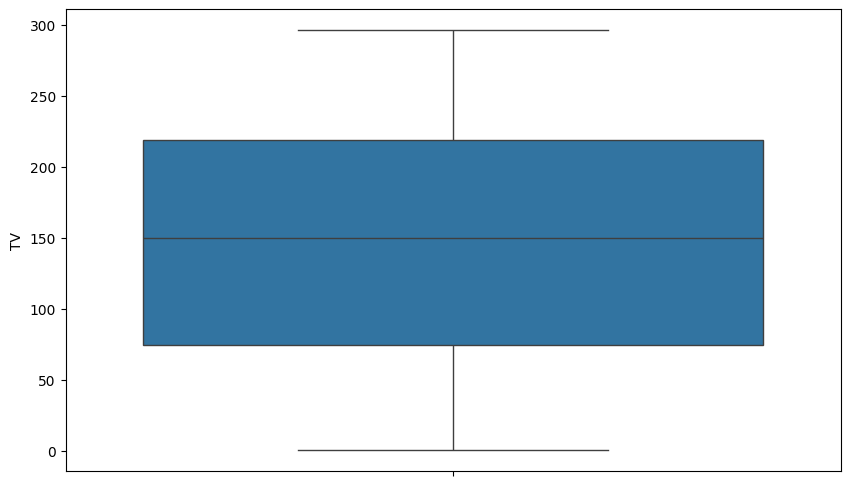

In [ ]:
sns.boxplot(df.TV)

# boxplot also tells us about the 25%/median/75% of the variable as well as
# any potential outliers (data points that end up outside of the whiskers)

# In ML, in contrast to statistics, outliers do not mean something is problematic unless there was a systematic failure in data gathering process.
# The only thing we care about is if there are under-represented observation points.

<Axes: ylabel='newspaper'>

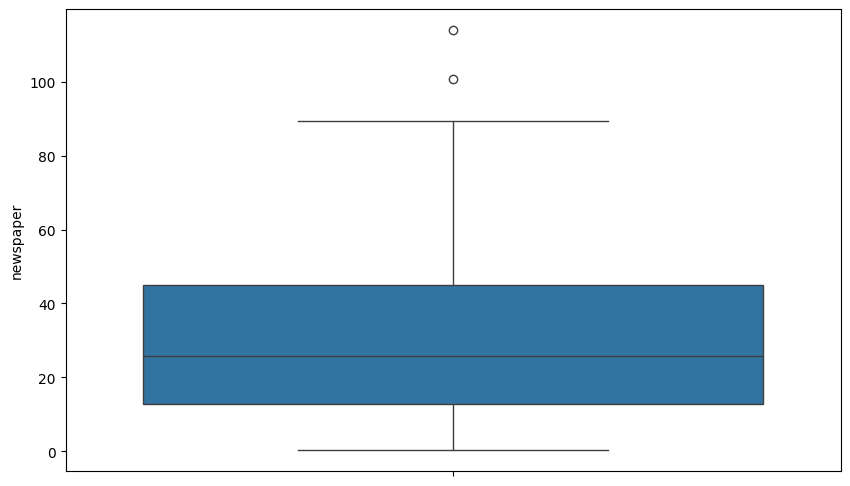

In [ ]:
sns.boxplot(df['newspaper'])

<Axes: ylabel='radio'>

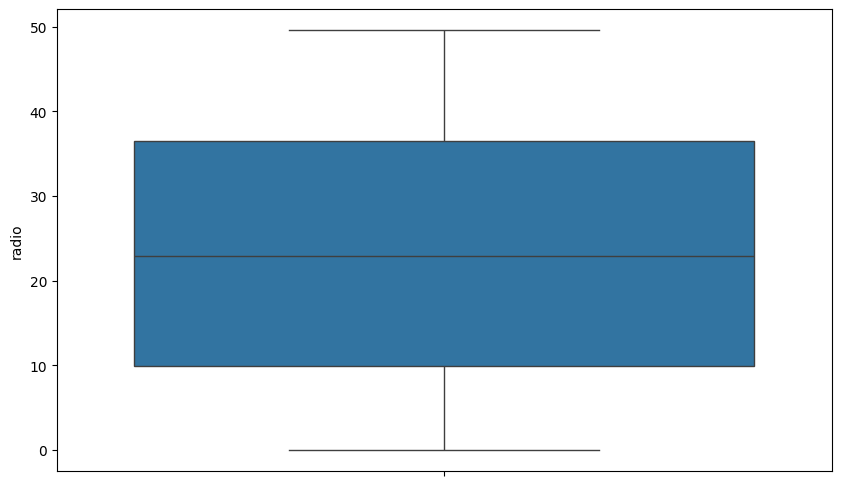

In [ ]:
sns.boxplot(df['radio'])

## Which feature is more suitable for linear regression?

In [ ]:
df["sales"].corr(df["TV"])

# We assume that there's a linear relationship between the independent and dependent variable(s). So long as this assumption holds true,
# the data is more or less suitable for linear regression.

0.7822244248616061

In [ ]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 60, 65, 70, 75, 80]}
df1 = pd.DataFrame(my_dict)
df1

,temperature,ice_cream_sale
0,30,50
1,31,60
2,32,65
3,33,70
4,34,75
5,35,80


In [ ]:
df1.temperature.corr(df1.ice_cream_sale)

# Correlation tells us how features correlate. Doesn't necessarily formulate the impact amount of an increase/decrease of a variable on the other.

# Regression helps as answer this question: How much of a change will I see if I change temperature variable by one unit.

0.989743318610787

In [ ]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 51, 53, 54, 55, 56]}
df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,51
2,32,53
3,33,54
4,34,55
5,35,56


In [ ]:
df2.temperature.corr(df2.ice_cream_sale)


0.9921609337929049

In [ ]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")

# Check which features have high correlation with the target. Features with high correlations are more useful
# to use in linear regression.

corr between sales and TV          :  0.7822244248616061
corr between sales and radio       :  0.5762225745710551
corr between sales and newspaper   :  0.22829902637616528
corr between sales and total_spend :  0.8677123027017427


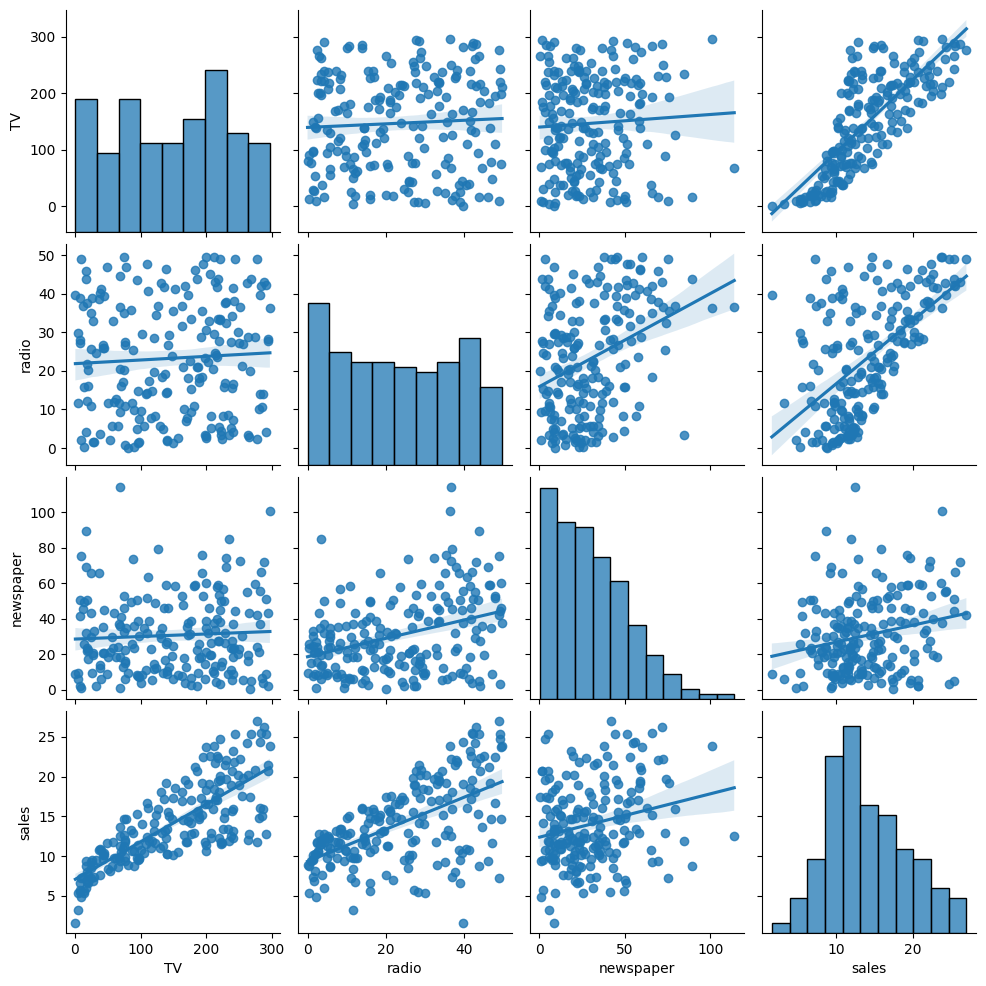

In [ ]:
sns.pairplot(df, kind="reg");

# Pairplot also helps us visualise potential correlations between all features.

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


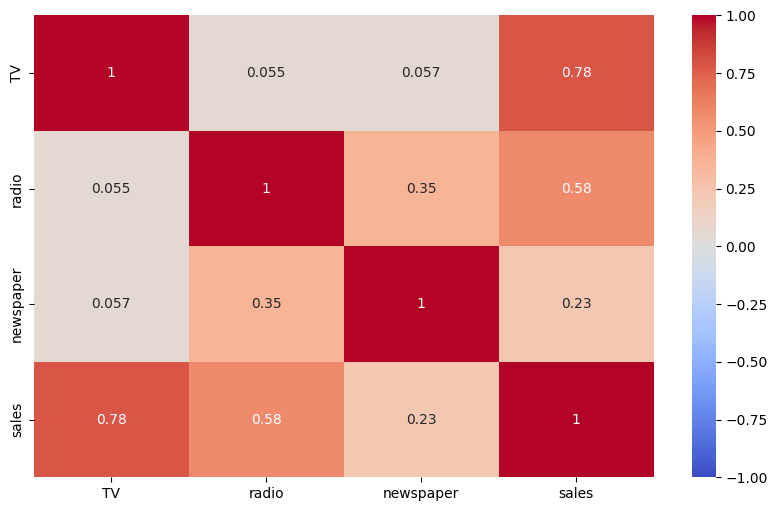

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

## Plotting the relationship between independent variable and dependent variable

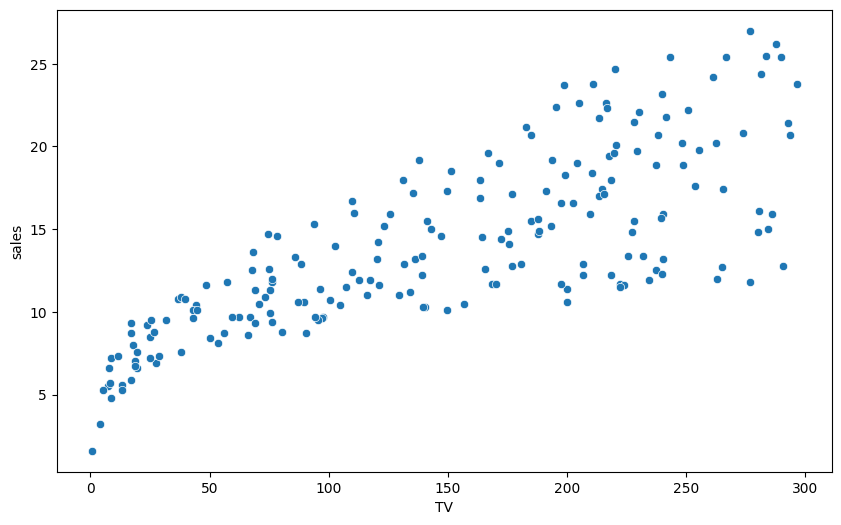

In [ ]:
sns.scatterplot(x="TV", y="sales", data=df);

# Can also visualise the correlation with scatterplot.

## Correlation between independent variable and dependent variable

## Coefficient of determination (R2)

In [ ]:
R2_score = corr**2
R2_score

# R2 score tell us how much of the variation in the target column can be explained with the independent features we have at hand.
# Statistically [0, 1]
# Sklearn [-np.inf, 1]

0.7529246402599608

## Linear Regression

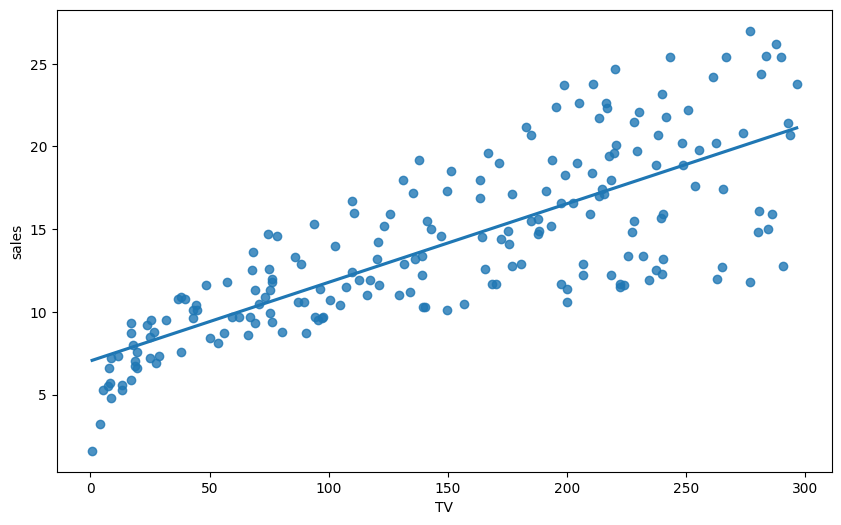

In [ ]:
sns.regplot(x="TV", y="sales", data=df, ci=None);

# We can use `regplot` from `seaborn` to fit a regression line to this data and visualise it as it's only 2-D.

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [ ]:
# y_pred = b1X + b0

In [ ]:
X = df["TV"]
y = df["sales"]

## Determination of coefficients (slope and intercept)

In [ ]:
np.polyfit(X, y, deg=1)
# conficcence : 1 degree

# We can use the `polyfit` function from numpy to calculate the linear regression coefficients. This
# step is redundant and only for training purposes. There are far more useful methods to do this automatically which we will see in the upcoming lectures.

# polyfit means polynomial fit. A polynomial with a degree of 1 is a linear fit. Keep that in mind.

array([0.04753664, 7.03259355])

In [ ]:
slope, intercept = np.polyfit(X, y, deg=1)

# Slope is the coefficient of our independent feature.
# Intercept is the y value when x=0

In [ ]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.04753664043301975
intercept: 7.0325935491276965


## Why do we use the least squares error method to find the regression line that best fits the data?

In [ ]:
# y_pred = 0.04868787931904817*X + 4.243028216036326

In [ ]:
b1, b0 = np.polyfit(X, y, deg=1)

# b1 = slope, b0= intercept

In [ ]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.04753664043301975
b0 : 7.0325935491276965


In [ ]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [ ]:
y_pred = b1*X + b0

In [ ]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
df_2 = pd.DataFrame(values)
df_2


# LSE = least squared errors
# ABS = absolute errors
# Remember that LSE squares the residuals, hence penalises high errors whereas ABS does not do that.

# Which metric to use will depend on your use case. If you have a lot of outliers in the dataset, LSE can be useful.

,actual,predicted,residual,LSE,ABS
0,22.1,17.970775,4.129225,17.050503,4.129225
1,10.4,9.147974,1.252026,1.567569,1.252026
2,9.3,7.850224,1.449776,2.101851,1.449776
3,18.5,14.234395,4.265605,18.195390,4.265605
4,12.9,15.627218,-2.727218,7.437719,2.727218
...,...,...,...,...,...
195,7.6,8.848493,-1.248493,1.558735,1.248493
196,9.7,11.510545,-1.810545,3.278073,1.810545
197,12.8,15.446579,-2.646579,7.004380,2.646579
198,25.5,20.513985,4.986015,24.860348,4.986015


In [ ]:
df_2.residual.sum().round()

# Sum of residuals in linear regression will always be (almost, considering floating point precision) equal to 0.

-0.0